# Demo: Computing a Point Spread Function (PSF)

This guide demonstrates how to compute a PSF with a chosen propagator (model) and a set of given parameters. We'll explore 2D and 3D PSFs.

### **Setup: Importing the Required Libraries**

In [2]:
import math
from psf_generator.propagators import *
from psf_generator.utils.plots import plot_pupil, plot_psf

# **Example 1: Computing a 2D PSF**

We start with the `ScalarSphericalPropagator` (though the results would be similar with the `ScalarCartesianPropagator`).

### **Defining Parameters**

Group the physical and computational parameters into a dictionary, `kwargs`. These parameters define the system's numerical aperture (NA), wavelength, field of view (FoV), and pixel discretization:

In [3]:
kwargs = {
    'n_pix_pupil': 127,    # Pixels in the pupil plane
    'n_pix_psf': 256,      # Pixels in the image plane
    'na': 0.8,             # Numerical aperture
    'wavelength': 632,     # Wavelength (nm)
    'fov': 2000,           # Field of view (nm)
}

### **Calculating the PSF**

Instantiate the propagator and compute the 2D PSF:

In [4]:
propagator = ScalarSphericalPropagator(**kwargs)
psf = propagator.compute_focus_field()

### **Visualizing the PSF**

The PSF is complex-valued, so we can visualize its modulus, phase, and intensity. Intensity is defined as the square of the modulus:


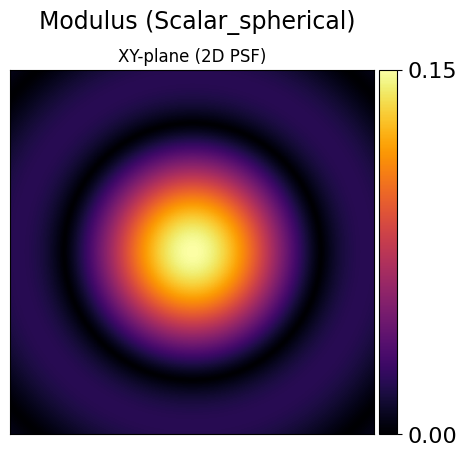

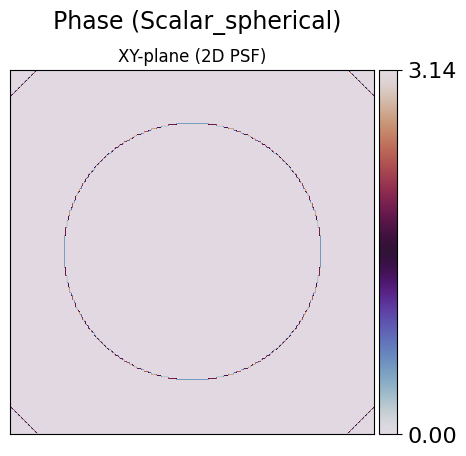

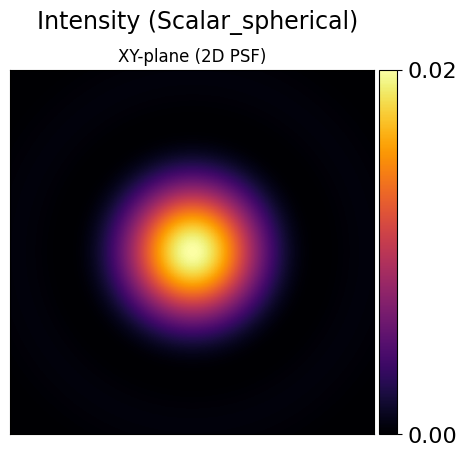

In [5]:
for quantity in ['modulus', 'phase', 'intensity']:
    plot_psf(
        psf=psf,
        name_of_propagator=propagator.get_name(),
        quantity=quantity,
        show_titles=True,
        show_cbar_ticks=True
    )


# **Example 2: Exploring the Effect of Physical Parameters**

This example investigates how optical parameters affect the PSF. Let's assume we have a more resolutive system — an optical system capable of distinguishing finer details. Based on optical theory, achieving higher resolution requires either a higher numerical aperture (NA), or a shorter wavelength, or both.

### **Modified Parameters**

In [6]:
kwargs = {
    'n_pix_pupil': 127,    # Number of pixels for the pupil function
    'n_pix_psf': 256,      # Number of pixels for the PSF
    'na': 1.3,             # Higher numerical aperture (NA)
    'wavelength': 480,     # Shorter wavelength (in nm)
    'fov': 2000,           # Field of view (in nm)
}

### **Compute and Visualize the PSF**

Compute the PSF using the modified parameters and compare it with the original PSF.

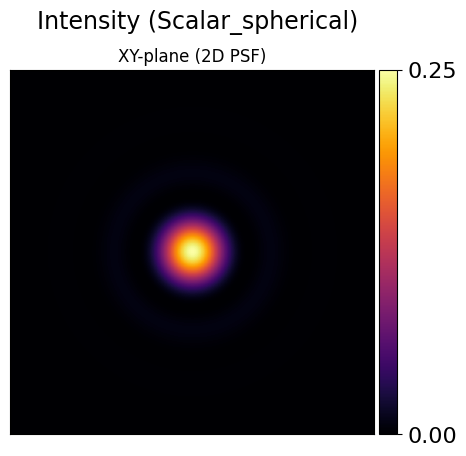

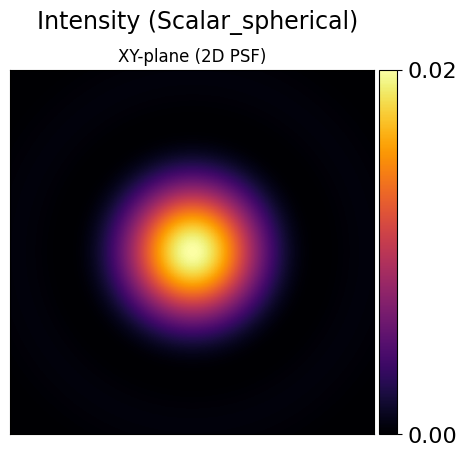

In [7]:
# Compute the PSF with the new parameters
new_propagator = ScalarSphericalPropagator(**kwargs)
new_psf = new_propagator.compute_focus_field()

# Plot the new PSF
plot_psf(
    psf=new_psf,
    name_of_propagator=new_propagator.get_name(),
    quantity='intensity',
    show_titles=True,
    show_cbar_ticks=True
)

# Optionally compare it with the previous PSF (if `propagator` and `psf` exist)
plot_psf(
    psf=psf,
    name_of_propagator=propagator.get_name(),
    quantity='intensity',
    show_titles=True,
    show_cbar_ticks=True
)


### **Observation**

A smaller diffraction pattern corresponds to an optical system with higher resolution. As shown in the first plot, the new PSF has a smaller-in-size diffraction pattern compared to the previous one.

# **Example 3: Computing a 3D PSF**

To explore 3D PSFs, we extend the parameters to include defocus values.

### **Updated Parameters for 3D PSF**

Define the range and step size for the defocus along the z-axis:

In [8]:
kwargs = {
    'n_pix_pupil': 127,
    'n_pix_psf': 256,
    'na': 1.3,
    'wavelength': 480,
    'fov': 2000,
    'defocus_min': -4000,  # Minimum defocus (nm)
    'defocus_max': 4000,   # Maximum defocus (nm)
    'n_defocus': 301,      # Number of defocus slices
}


### **Compute and Visualize the 3D PSF**

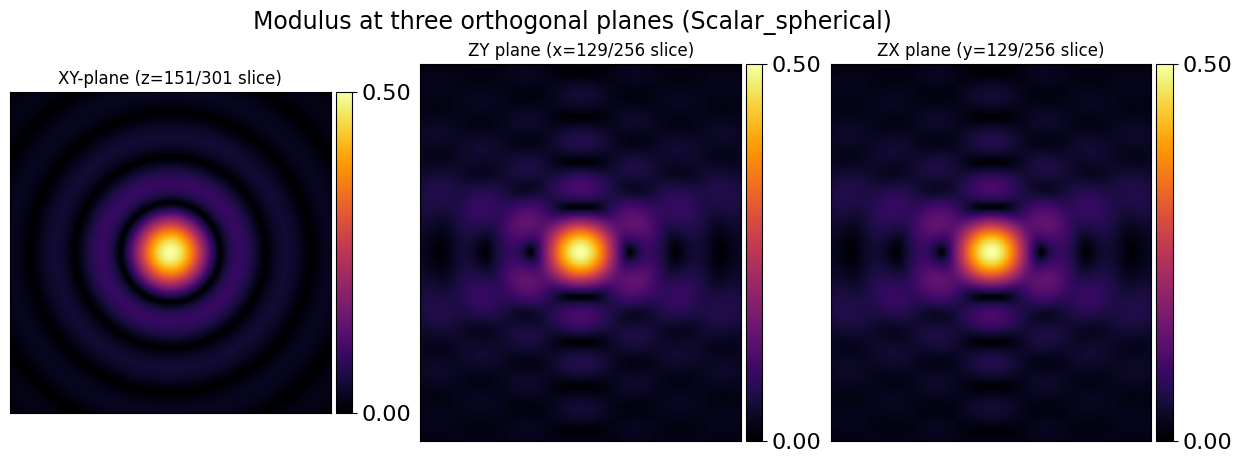

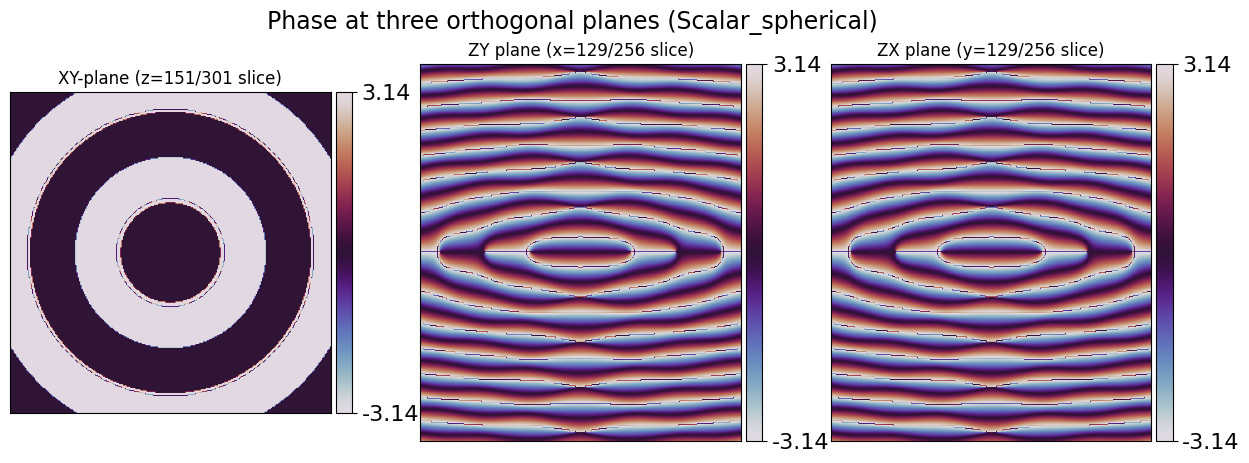

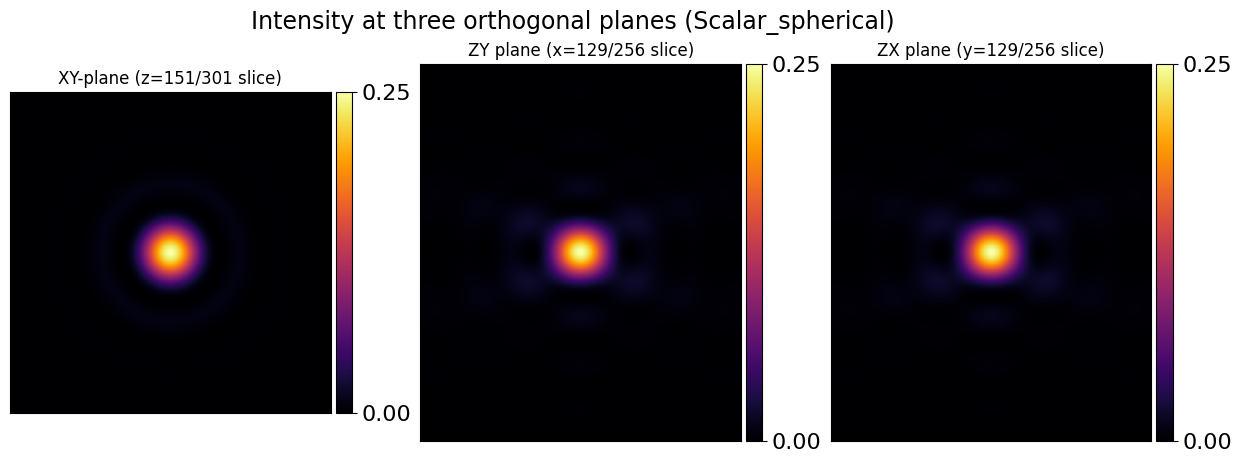

In [9]:
propagator = ScalarSphericalPropagator(**kwargs)
psf_3D = propagator.compute_focus_field()

for quantity in ['modulus', 'phase', 'intensity']:
    plot_psf(
        psf=psf_3D,
        name_of_propagator=propagator.get_name(),
        quantity=quantity,
        show_titles=True,
        show_cbar_ticks=True
    )


# **Example 4: Computing a 3D PSF exploiting the vectorial nature of light**

The correct way to handle electric fields is to account for their vectorial nature, with components in all three spatial dimensions. This requires using either the `VectorialSphericalPropagator` or the `VectorialCartesianPropagator`. Additionally, we must define the polarization of the incoming field.

In this example, we use circular polarization, represented as:
$(e_0^x, e_0^y) = (\frac{\sqrt(2)}{2}, \frac{\sqrt(2)}{2}\mathrm{j})$

Other types of polarization, such as linear, can also be used.

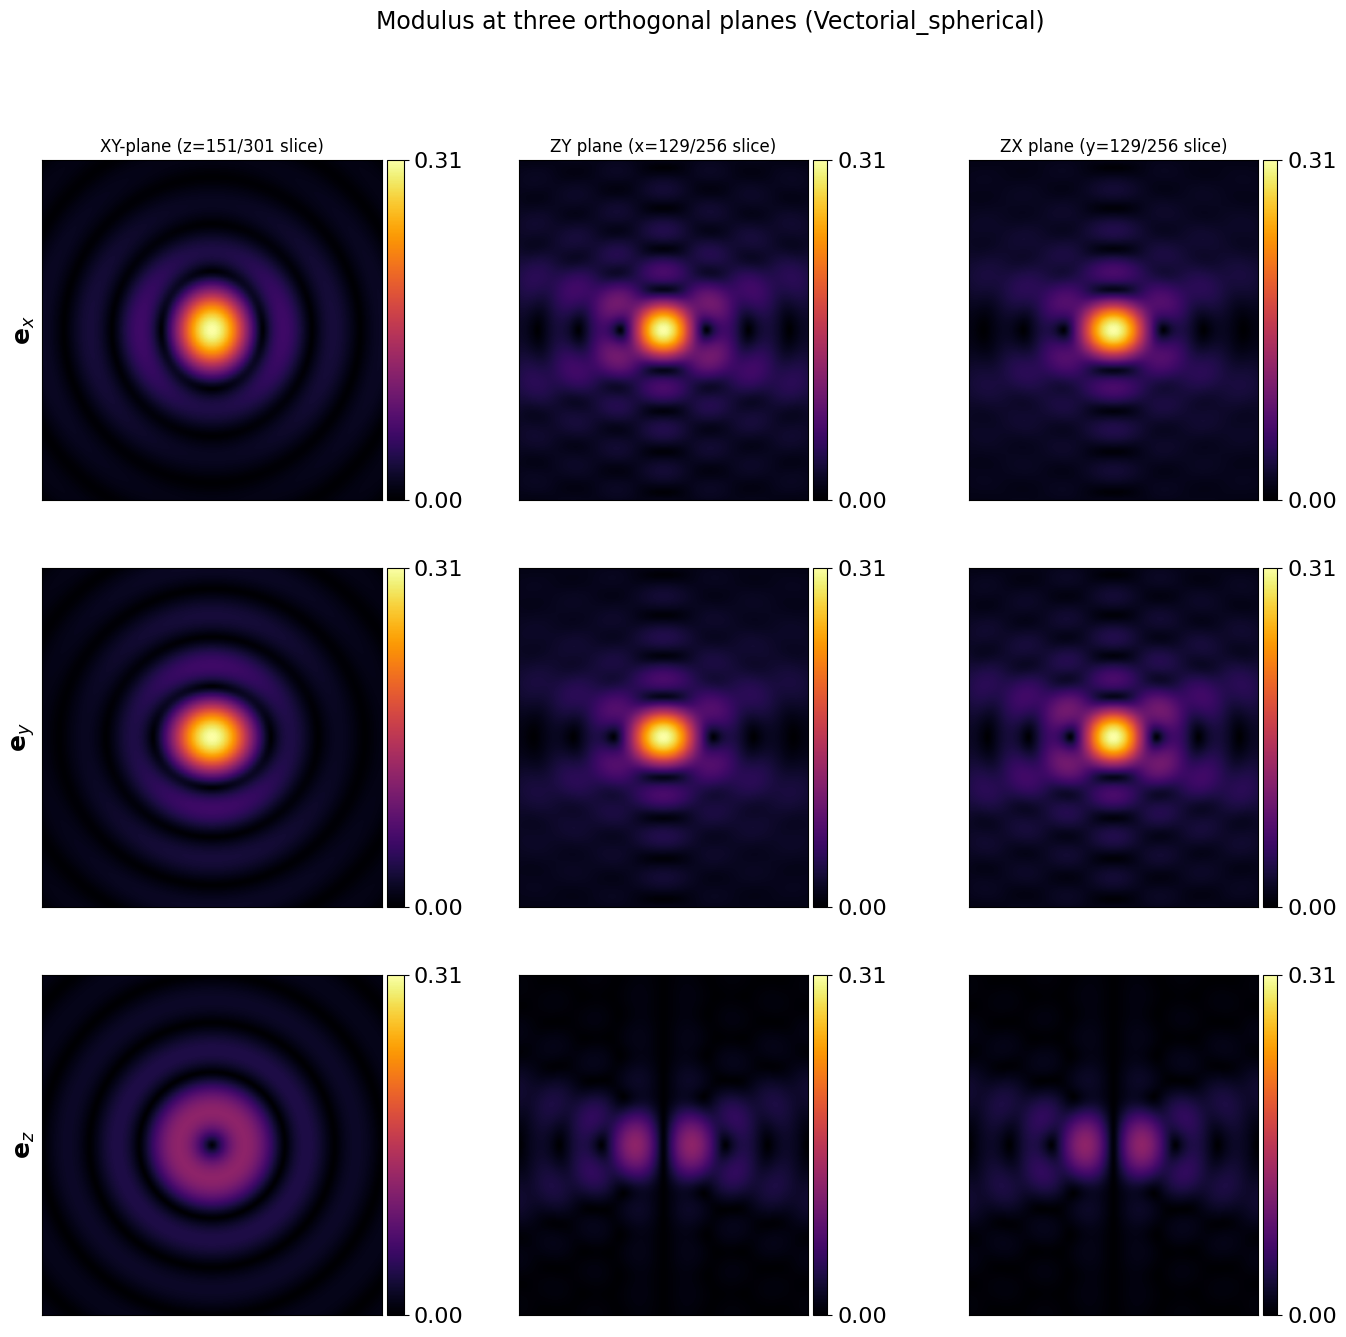

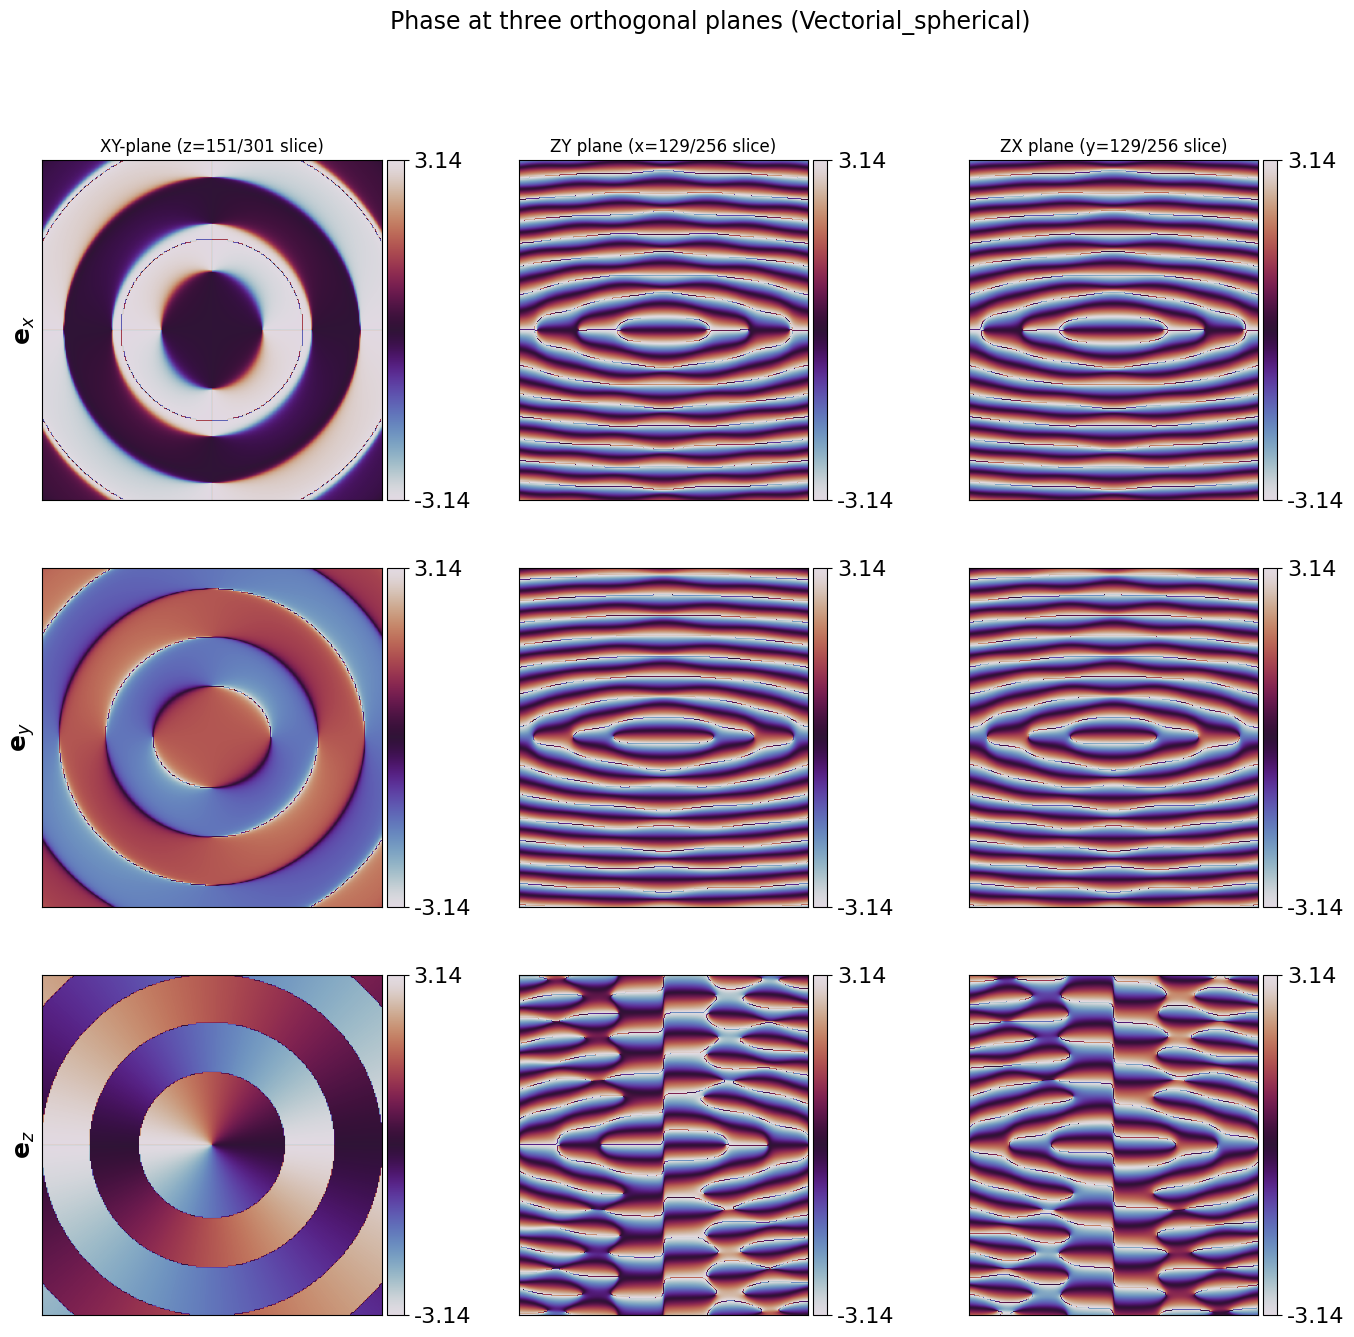

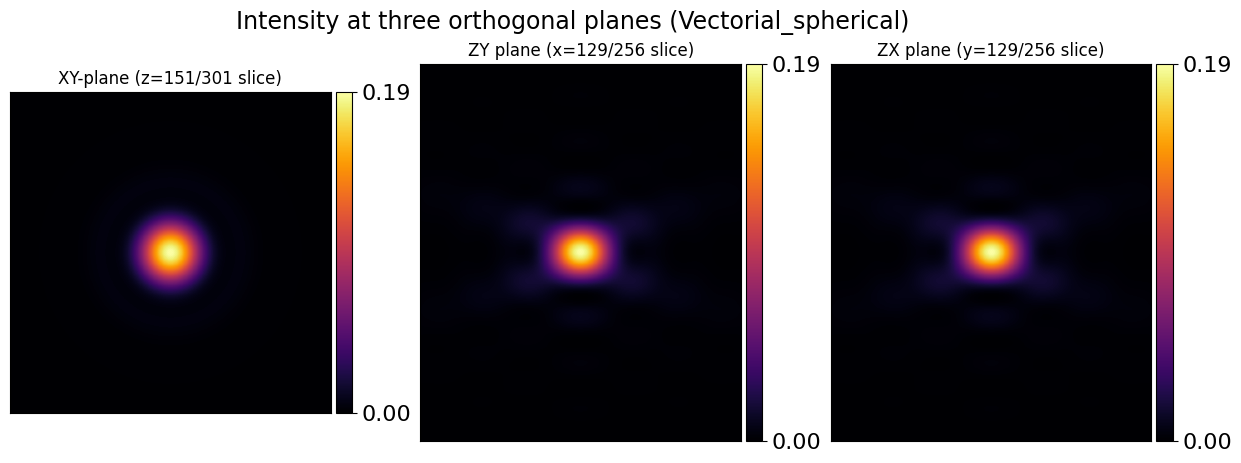

In [10]:
kwargs = {
    'n_pix_pupil': 127,
    'n_pix_psf': 256,
    'na': 1.3,
    'wavelength': 480,
    'fov': 2000,
    'defocus_min': -4000,
    'defocus_max': 4000,
    'n_defocus': 301,
    'e0x': math.sqrt(2) / 2,
    'e0y': math.sqrt(2) / 2 * 1j,
}

propagator = VectorialSphericalPropagator(**kwargs)
psf_vec = propagator.compute_focus_field()

# Visualize the modulus, phase, and intensity of the PSF
for quantity in ['modulus', 'phase', 'intensity']:
    plot_psf(psf=psf_vec, name_of_propagator=propagator.get_name(), quantity=quantity, show_titles=True, show_cbar_ticks=True)
